In [ ]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import cross_val_score
from sklearn import svm
import gensim
from gensim.utils import simple_preprocess


In [ ]:
nltk.download('stopwords')
nltk.download('gutenberg')
!pip install pyLDAvis
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


# **Performance function draw confusion matrix and calculate accuracy**

In [ ]:
def performance(y,y_predict):
    print('Confusion matrix\n')
    hm=sn.heatmap(confusion_matrix(y,y_predict), annot=True)
    plt.show()
    counter=0
    comp=[]
    for i in range(len(y)):
        if y[i]!=y_predict[i]:
            counter+=1
            comp.append(0)
        else:
            comp.append(1)

    comp=np.array(comp)
    score=(1-counter/len(y))*100
    print('Score',score,'%')
    return score

# **Book segmentation function clean, tokenize, and generate random samples**

In [ ]:
def book_segmentation(book, book_name,size,ln):
    #function to segment book to  200 random sample of 100 words
    #this tokenizer with regular expression to remove punctuation so ensure that you have only words
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized_words=tokenizer.tokenize(book)
    offset = 0
    stop_words=set(stopwords.words("english"))
    filtered_sents=[]
    for w in tokenized_words:#is this wrong and should be tokenized_word?
        if w.lower() not in stop_words:
            filtered_sents.append(w.lower())
    pages = []
    offset=0
    for i in range(size):
        #generate random number from 0 to words count - 100 to be starting point of segment
        offset+=np.random.randint(0,50)
        pages.append({'book_name': book_name,
                      'partition': " ".join(filtered_sents[offset:offset+ln])+" "})
    return pages

# **Reading books and generate 200 samples of 100 word**

In [ ]:
books = ['austen-emma.txt', 'blake-poems.txt','carroll-alice.txt','shakespeare-macbeth.txt', 'whitman-leaves.txt']
books_names = ['austen-emma', 'blake-poems','carroll-alice','shakespeare-macbeth', 'whitman-leaves']

book_pages=[]
for book_name in books:
    book = nltk.corpus.gutenberg.raw(book_name)
    book_pages+=book_segmentation(book, book_name[:-4],200,100)
    

# **Split data extracted from books to training and testing sets**

In [ ]:
books_df= pd.DataFrame(book_pages)
# print(books_df)
df_x=books_df['partition']
df_y=books_df['book_name']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=4)


# **Vectorize function apply BOW and tfidf transformation on dataset**

In [ ]:
def vectorize(x_tr,x_te):
    CountVec = CountVectorizer(ngram_range=(1,1))
    #transform
    Count_data = CountVec.fit_transform(x_train)
    #create dataframe
    cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(Count_data)
    X_new_counts = CountVec.transform(x_test)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)

    return X_train_tfidf,X_new_tfidf
X,X_test =vectorize(x_train, x_test)

# creating LDA topic modeling 

In [ ]:
#splitting the documents into words
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
Data=list(sent_to_words(x_train))
print(Data)



#LDA 
       
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(Data)
# Create Corpus
texts = Data
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])



from pprint import pprint
# Build LDA model
num_topics = 20
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

[['didst', 'thou', 'heare', 'noyse', 'lady', 'heard', 'owle', 'schreame', 'crickets', 'cry', 'speake', 'macb', 'lady', 'macb', 'descended', 'lady', 'macb', 'hearke', 'lyes', 'th', 'second', 'chamber', 'lady', 'donalbaine', 'mac', 'sorry', 'sight', 'lady', 'foolish', 'thought', 'say', 'sorry', 'sight', 'macb', 'one', 'laugh', 'sleepe', 'one', 'cry', 'murther', 'wake', 'stood', 'heard', 'say', 'prayers', 'addrest', 'againe', 'sleepe', 'lady', 'two', 'lodg', 'together', 'macb', 'one', 'cry', 'god', 'blesse', 'vs', 'amen', 'seene', 'hangmans', 'hands', 'listning', 'feare', 'could', 'say', 'amen', 'say', 'god', 'blesse', 'vs', 'lady', 'consider', 'deepely', 'mac', 'wherefore', 'could', 'pronounce', 'amen', 'need', 'blessing', 'amen', 'stuck', 'throat', 'lady', 'deeds', 'must', 'thought', 'wayes', 'make', 'vs', 'mad', 'macb', 'thought', 'heard', 'voyce', 'cry', 'sleep', 'macbeth', 'murther'], ['stretching', 'across', 'continent', 'see', 'atlantica', 'depths', 'pulses', 'american', 'europe', 

# visualing the output after applying LDA

In [ ]:
# import pyLDAvis.gensim
import os
import pickle 
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.enable_notebook()


LDAvis_data_filepath = os.path.join(str(num_topics))  

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)


pyLDAvis.save_html(LDAvis_prepared,'.html')  

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.021895 -0.061141       1        1  9.509307
2     -0.069890  0.033393       2        1  8.174085
0     -0.077076  0.035797       3        1  7.530902
1      0.105238 -0.012343       4        1  7.254084
10     0.071407  0.082274       5        1  7.236575
13     0.069036 -0.028349       6        1  6.364041
9     -0.004502  0.007143       7        1  5.802817
5      0.000168  0.010016       8        1  5.750389
17    -0.022495 -0.056579       9        1  5.171931
6      0.064684 -0.041642      10        1  4.821538
3      0.014397 -0.020758      11        1  4.489707
7      0.012908 -0.077907      12        1  3.857502
11     0.034407  0.127084      13        1  3.856777
14    -0.011489  0.027410      14        1  3.845759
19     0.002689  0.038605      15        1  3.449028
8     -0.040062  0.032802      16        1  3.270529
15    -0.041215 -0.040142      17        1  3.230196
12    -0.058001 -0.016397      18        1  2.754366
4     -0.008245 -0.025029      19        1  2.207281
18    -0.063857 -0.014238      20        1  1.423185, topic_info=             Term        Freq       Total Category  logprob  loglift
345          said  429.000000  429.000000  Default  30.0000  30.0000
447         alice  362.000000  362.000000  Default  29.0000  29.0000
1722         thee  213.000000  213.000000  Default  28.0000  28.0000
567   caterpillar   78.000000   78.000000  Default  27.0000  27.0000
528          land  130.000000  130.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
1722         thee    2.298531  213.109515  Topic20  -6.0043  -0.2773
23           lady    2.180695  116.663282  Topic20  -6.0569   0.2726
473          like    2.317228  285.200874  Topic20  -5.9962  -0.5605
791         would    2.282517  280.670336  Topic20  -6.0113  -0.5596
239          good    2.275949  252.079647  Topic20  -6.0142  -0.4551

[1596 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1079     15  0.278841  abandonment
1079     19  0.278841  abandonment
5057     13  0.491445        abase
5058     13  0.461887       abased
3703      2  0.247554    according
...     ...       ...          ...
219      14  0.027936        youth
219      15  0.013968        youth
219      19  0.013968        youth
219      20  0.013968        youth
5484      7  0.293789         zeal

[6166 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 3, 1, 2, 11, 14, 10, 6, 18, 7, 4, 8, 12, 15, 20, 9, 16, 13, 5, 19])

# **Support Vector Machine**

In [ ]:
cv = KFold( n_splits=10, shuffle=False, random_state=None)


total=0
for train_index, test_index in cv.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_tr, y_te = y_train.values[train_index], y_train.values[test_index]
    svm_clf = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))

    svm_clf.fit(x_train, y_tr)
    predicted = svm_clf.predict(x_test)
    score=svm_clf.score(x_test,y_te)
    print('accuracy:',score)
    total+=score
    # if(score>max_score):
    #     svm_champion=svm_clf
    #     max_score=score

print('mean accuracy:',total/10)



accuracy: 0.9714285714285714
accuracy: 0.9142857142857143
accuracy: 0.9857142857142858
accuracy: 0.9857142857142858
accuracy: 0.9857142857142858
accuracy: 0.9714285714285714
accuracy: 0.9714285714285714
accuracy: 0.9714285714285714
accuracy: 0.9714285714285714
accuracy: 0.9571428571428572
mean accuracy: 0.9685714285714286


* default parameters give mean accaracy 0.99

* in SVM using gamma='auto' mean accuracy 0.95
* using kernel='sigmoid' mean accuaracy 0.96




# **Error analysis of best SVM model**

Confusion matrix



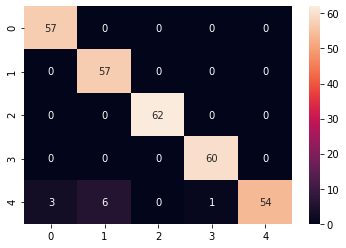

Score 96.66666666666667 %
                     precision    recall  f1-score   support

        austen-emma       1.00      0.95      0.97        60
        blake-poems       1.00      0.90      0.95        63
      carroll-alice       1.00      1.00      1.00        62
shakespeare-macbeth       1.00      0.98      0.99        61
     whitman-leaves       0.84      1.00      0.92        54

           accuracy                           0.97       300
          macro avg       0.97      0.97      0.97       300
       weighted avg       0.97      0.97      0.97       300



In [ ]:
pred=svm_clf.predict(X_test)
svm_score=performance(pred,y_test.values)
print(metrics.classification_report(y_test.values, pred))

# **Decision Trees**

In [ ]:


total=0
for train_index, test_index in cv.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_tr, y_te = y_train.values[train_index], y_train.values[test_index]
    tree_clf = tree.DecisionTreeClassifier()
    tree_clf.fit(x_train, y_tr)
    predicted = tree_clf.predict(x_test)
#     score=performance(predicted,y_te)
    score=tree_clf.score(x_test,y_te)
    print('accuracy:',score)
    total+=score
print('mean accuracy:',total/10)



accuracy: 0.9285714285714286
accuracy: 0.9428571428571428
accuracy: 0.9142857142857143
accuracy: 0.9285714285714286
accuracy: 0.9285714285714286
accuracy: 1.0
accuracy: 1.0
accuracy: 0.9714285714285714
accuracy: 0.9
accuracy: 0.8714285714285714
mean accuracy: 0.9385714285714286


* defaul parameters mean accuracy 0.95
* max_depth=1  gives 0.35
* max_depth=5 gives 0.82
* max_depth=10 gives 0.90


# **Error analysis Decision trees model**

Confusion matrix



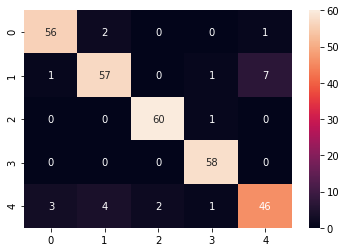

Score 92.33333333333333 %
                     precision    recall  f1-score   support

        austen-emma       0.95      0.93      0.94        60
        blake-poems       0.86      0.90      0.88        63
      carroll-alice       0.98      0.97      0.98        62
shakespeare-macbeth       1.00      0.95      0.97        61
     whitman-leaves       0.82      0.85      0.84        54

           accuracy                           0.92       300
          macro avg       0.92      0.92      0.92       300
       weighted avg       0.93      0.92      0.92       300



In [ ]:
pred=tree_clf.predict(X_test)
tree_score=performance(pred,y_test.values)
print(metrics.classification_report(y_test.values, pred))

# **KNeighbors Classifier**

In [ ]:
total=0
for train_index, test_index in cv.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_tr, y_te = y_train.values[train_index], y_train.values[test_index]
    neigh = KNeighborsClassifier(weights='distance',n_neighbors=4)
    neigh.fit(x_train, y_tr)
    predicted = neigh.predict(x_test)
    score=neigh.score(x_test,y_te)
    print('accuracy:',score)
    total+=score
print('mean accuracy:',total/10)


accuracy: 0.8571428571428571
accuracy: 0.9142857142857143
accuracy: 0.7571428571428571
accuracy: 0.8857142857142857
accuracy: 0.8857142857142857
accuracy: 0.8142857142857143
accuracy: 0.7857142857142857
accuracy: 0.8571428571428571
accuracy: 0.9
accuracy: 0.8714285714285714
mean accuracy: 0.8528571428571429


* default parameters gives mean accuaracy 0.61
* n_neighbors=1 gives mean accuaracy 0.96
* n_neighbors=3 gives mean accuaracy 0.85
* weights='distance' increases accuaracy to 0.71

# **Error analysis of best Kneighbors Classifier model**

Confusion matrix



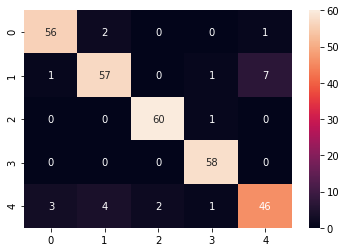

Score 92.33333333333333 %
                     precision    recall  f1-score   support

        austen-emma       0.95      0.93      0.94        60
        blake-poems       0.86      0.90      0.88        63
      carroll-alice       0.98      0.97      0.98        62
shakespeare-macbeth       1.00      0.95      0.97        61
     whitman-leaves       0.82      0.85      0.84        54

           accuracy                           0.92       300
          macro avg       0.92      0.92      0.92       300
       weighted avg       0.93      0.92      0.92       300



In [ ]:
predicted = neigh.predict(X_test)
neigh_score=performance(pred,y_test.values)
print(metrics.classification_report(y_test.values, pred))

# **Comparing and choosing champion model**

In [ ]:
if(svm_score>tree_score and svm_score>neigh_score):
    print("SVM is the champion model with score: ",svm_score,'%')
elif(tree_score>neigh_score):
    print('Decision Trees is the champion model with score: ',tree_score,'%')
else:
    print('KNeighborsClassifier is the champion model with score: ',neigh_score,'%')


SVM is the champion model with score:  96.66666666666667 %


# **Visualization**

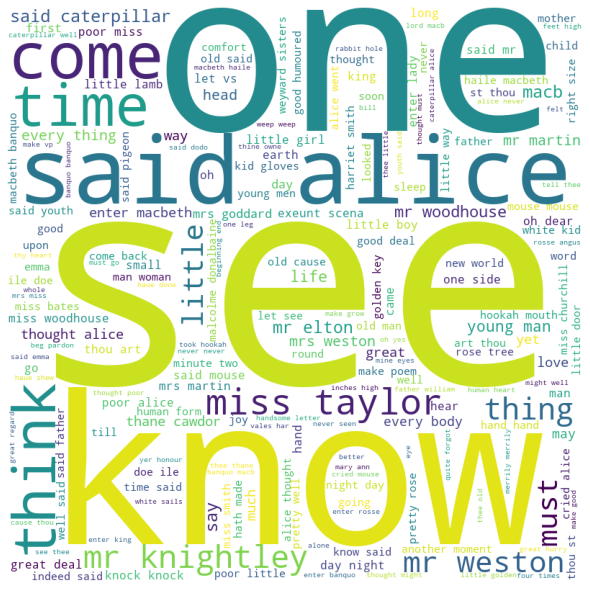

In [ ]:
  
df = df_x
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df:
      
    val = str(val)  
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()